In [12]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
plt.style.use('fivethirtyeight')
data=foldername = 'ml-100k/'

ratings_filename = foldername + 'u.data'
items_filename = foldername + 'u.item'
users_filename = foldername + 'u.user'

ratings = pd.read_csv(ratings_filename,sep='\t',header=None, names = ['user id', 'item id','rating','timestamp'])
items =  pd.read_csv(items_filename,sep='|',header=None, names = ['item id', 'movie title', 'release date','video release date',
              'IMDb URL','access year', 'unknown', 'Action', 'Adventure', 'Animation',
              'Children\'s', 'Comedy', 'Crime', 'Documentary', 'Drama', 'Fantasy',
              'Film-Noir', 'Horror', 'Musical', 'Mystery', 'Romance', 'Sci-Fi',
              'Thriller', 'War', 'Western'], encoding = 'windows-1252')
users =  pd.read_csv(users_filename,sep='|',header=None, names = ['user id', 'age', 'gender', 'occupation', 'zip code'], encoding = 'iso-8859-1')


rating
1     6110
2    11370
3    27145
4    34174
5    21201
Name: user id, dtype: int64


,user id,item id,rating,timestamp
count,100000.00000,100000.000000,100000.000000,1.000000e+05
mean,462.48475,425.530130,3.529860,8.835289e+08
std,266.61442,330.798356,1.125674,5.343856e+06
min,1.00000,1.000000,1.000000,8.747247e+08
25%,254.00000,175.000000,3.000000,8.794487e+08
50%,447.00000,322.000000,4.000000,8.828269e+08
75%,682.00000,631.000000,4.000000,8.882600e+08
max,943.00000,1682.000000,5.000000,8.932866e+08


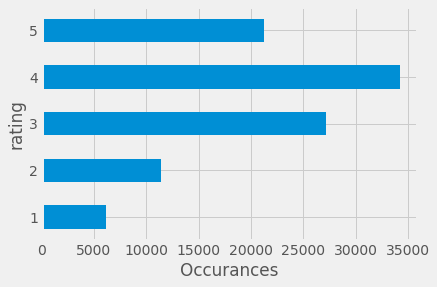

In [38]:
ratingsabsolut=ratings.groupby(['rating'])['user id'].count()
print(ratingsabsolut)
ratingsabsolut.plot.barh(ratingsabsolut)
plt.xlabel('Occurances')
ratings.describe()



    age
49    7
56   10
50   11
40   13
46   14
..  ...
52   66
53   68
59   69
60   70
57   73

[61 rows x 1 columns]


Text(0, 0.5, 'Average rating for age')

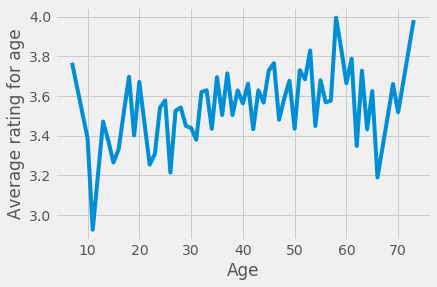

In [117]:
UR=pd.merge(ratings,users)
age=UR['age']
age=age.drop_duplicates()
age=age.reset_index(drop=True)
age=age.sort_values()
age.columns=['age']
age=age.to_frame()
print(age)
UR=pd.DataFrame(UR.groupby(['age']).agg('mean'))
plt.plot(UR['rating'])
plt.xlabel('Age')
plt.ylabel('Average rating for age')


In [128]:
UR=pd.merge(ratings,users)
UR=UR.groupby(['gender']).agg(['mean','sum'])[['age','rating']]
print(UR)


              age             rating        
             mean      sum      mean     sum
gender                                      
F       32.314724   831781  3.531507   90901
M       33.196930  2465204  3.529289  262085


Action         135.0
Adventure       42.0
Animation      122.0
Children's     505.0
Comedy         109.0
Crime           50.0
Documentary    725.0
Drama           22.0
Fantasy         24.0
Film-Noir       92.0
Horror          56.0
Musical         61.0
Mystery        247.0
Romance        101.0
Sci-Fi         251.0
Thriller        71.0
War             27.0
Western          0.0
dtype: float64


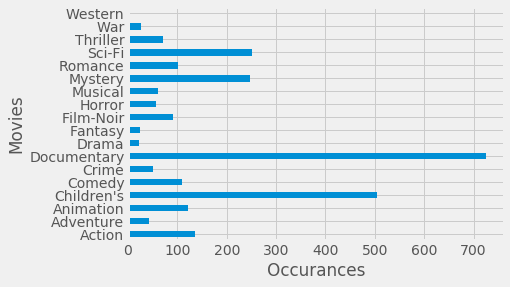

In [158]:
RI=pd.merge(ratings,items, how='inner', on='item id')[['item id','rating','Action', 'Adventure', 'Animation',
              'Children\'s', 'Comedy', 'Crime', 'Documentary', 'Drama', 'Fantasy',
              'Film-Noir', 'Horror', 'Musical', 'Mystery', 'Romance', 'Sci-Fi',
              'Thriller', 'War', 'Western']]
ss=RI.agg('sum')[['Action', 'Adventure', 'Animation',
              'Children\'s', 'Comedy', 'Crime', 'Documentary', 'Drama', 'Fantasy',
              'Film-Noir', 'Horror', 'Musical', 'Mystery', 'Romance', 'Sci-Fi',
              'Thriller', 'War', 'Western']]
ss.plot.barh()
plt.ylabel('Movies')
plt.xlabel('Occurances')
print(ss)

Text(0, 0.5, 'Occurances')

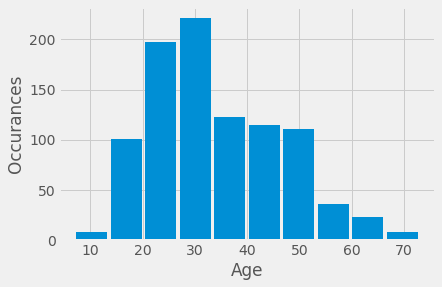

In [163]:
age=users.groupby('age').count()['user id']
plt.hist(users['age'],rwidth=0.9)
plt.xlabel('Age')
plt.ylabel('Occurances')
